In [1]:
#Import Libraries
import random
import pandas as pd
import collections
import operator
import re

In [2]:
#Preprocessing Dataset
columns=['StartTime','Duration', 'Protocol', 'Source','Direction','Dest', 'Flags','Tos','Packet','Bytes','Flows','Label']
lst=[]
with open('capture20110815-2.pcap.netflow.labeled') as fp:  
    for cnt, line in enumerate(fp):
        k=[]
        if cnt!=0:
            dat=line.split("\t")
            if len(dat)>=13:
                for d in dat:
                    d.strip()
                    if len(d)==0:
                        k = dat.remove(d)
            if k:
                lst.append(k)
            else: lst.append(dat)
dataset=pd.DataFrame(lst, columns=columns)

dataset['SourceIP'] = dataset.Source.str.split(':').str.get(0)
dataset['PORTSOURCE'] = dataset.Source.str.split(':').str.get(1)
dataset['DestinationIP'] = dataset.Dest.str.split(':').str.get(0)
dataset['PORTDESTINATION'] = dataset.Dest.str.split(':').str.get(1)
dataset

,StartTime,Duration,Protocol,Source,Direction,Dest,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION
0,2011-08-15 16:43:20.931,0.235,TCP,147.32.84.59:64131,->,164.8.32.159:54992,PA_,0,3,211,1,Background\n,147.32.84.59,64131,164.8.32.159,54992
1,2011-08-15 16:43:20.933,0.444,TCP,147.32.87.252:49218,->,147.32.80.13:3128,FPA_,0,300,19566,1,LEGITIMATE\n,147.32.87.252,49218,147.32.80.13,3128
2,2011-08-15 16:43:20.933,4.993,TCP,41.143.58.184:1328,->,147.32.86.179:58675,PA_,0,269,29373,1,Background\n,41.143.58.184,1328,147.32.86.179,58675
3,2011-08-15 16:43:20.933,0.187,TCP,147.32.86.155:51273,->,204.154.94.81:80,FA_,0,2,132,1,Background\n,147.32.86.155,51273,204.154.94.81,80
4,2011-08-15 16:43:20.933,0.442,TCP,147.32.80.13:3128,->,147.32.87.252:49218,FPA_,0,579,728343,1,LEGITIMATE\n,147.32.80.13,3128,147.32.87.252,49218
5,2011-08-15 16:43:20.933,4.961,TCP,147.32.86.179:58675,->,41.143.58.184:1328,PA_,0,141,9412,1,Background\n,147.32.86.179,58675,41.143.58.184,1328
6,2011-08-15 16:43:20.933,4.961,TCP,147.32.86.179:58675,->,151.42.234.124:50001,PA_,0,157,23327,1,Background\n,147.32.86.179,58675,151.42.234.124,50001
7,2011-08-15 16:43:20.934,0.189,TCP,147.32.86.155:51269,->,204.154.94.81:443,FPA_,0,3,235,1,Background\n,147.32.86.155,51269,204.154.94.81,443
8,2011-08-15 16:43:20.934,0.019,TCP,66.249.66.10:64580,->,147.32.87.36:80,FA_,0,2,132,1,LEGITIMATE\n,66.249.66.10,64580,147.32.87.36,80
9,2011-08-15 16:43:20.934,0.186,TCP,147.32.86.155:51268,->,204.154.94.81:443,FPA_,0,3,235,1,Background\n,147.32.86.155,51268,204.154.94.81,443


In [3]:
##clean dataset
dataset=dataset.drop("Direction",1)
dataset=dataset.drop("Source",1)
dataset=dataset.drop("Dest",1)
dataset

,StartTime,Duration,Protocol,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION
0,2011-08-15 16:43:20.931,0.235,TCP,PA_,0,3,211,1,Background\n,147.32.84.59,64131,164.8.32.159,54992
1,2011-08-15 16:43:20.933,0.444,TCP,FPA_,0,300,19566,1,LEGITIMATE\n,147.32.87.252,49218,147.32.80.13,3128
2,2011-08-15 16:43:20.933,4.993,TCP,PA_,0,269,29373,1,Background\n,41.143.58.184,1328,147.32.86.179,58675
3,2011-08-15 16:43:20.933,0.187,TCP,FA_,0,2,132,1,Background\n,147.32.86.155,51273,204.154.94.81,80
4,2011-08-15 16:43:20.933,0.442,TCP,FPA_,0,579,728343,1,LEGITIMATE\n,147.32.80.13,3128,147.32.87.252,49218
5,2011-08-15 16:43:20.933,4.961,TCP,PA_,0,141,9412,1,Background\n,147.32.86.179,58675,41.143.58.184,1328
6,2011-08-15 16:43:20.933,4.961,TCP,PA_,0,157,23327,1,Background\n,147.32.86.179,58675,151.42.234.124,50001
7,2011-08-15 16:43:20.934,0.189,TCP,FPA_,0,3,235,1,Background\n,147.32.86.155,51269,204.154.94.81,443
8,2011-08-15 16:43:20.934,0.019,TCP,FA_,0,2,132,1,LEGITIMATE\n,66.249.66.10,64580,147.32.87.36,80
9,2011-08-15 16:43:20.934,0.186,TCP,FPA_,0,3,235,1,Background\n,147.32.86.155,51268,204.154.94.81,443


In [4]:
infectedHost="147.32.84.165"

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pc1\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#Find class distribution
a=dataset['Label'].value_counts()
a

Background\n                  416267
LEGITIMATE\n                   37144
Botnet\n                        2079
Botnet FILTER_LEGITIMATE\n        50
Name: Label, dtype: int64

In [7]:
#Remove instances that have a background label
newdata=dataset[dataset.Label != 'Background\n']

In [ ]:
newdata

In [8]:
newdata['Label'].value_counts()

LEGITIMATE\n                  37144
Botnet\n                       2079
Botnet FILTER_LEGITIMATE\n       50
Name: Label, dtype: int64

In [9]:
newdata['true_label'] = newdata['Label'].str.contains('Botnet')
newdata

C:\Users\pc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,StartTime,Duration,Protocol,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION,true_label
1,2011-08-15 16:43:20.933,0.444,TCP,FPA_,0,300,19566,1,LEGITIMATE\n,147.32.87.252,49218,147.32.80.13,3128,False
4,2011-08-15 16:43:20.933,0.442,TCP,FPA_,0,579,728343,1,LEGITIMATE\n,147.32.80.13,3128,147.32.87.252,49218,False
8,2011-08-15 16:43:20.934,0.019,TCP,FA_,0,2,132,1,LEGITIMATE\n,66.249.66.10,64580,147.32.87.36,80,False
10,2011-08-15 16:43:20.934,0.000,TCP,FA_,0,1,66,1,LEGITIMATE\n,147.32.87.36,80,66.249.66.10,64580,False
36,2011-08-15 16:43:20.958,4.965,TCP,A_,0,86,5160,1,LEGITIMATE\n,113.193.72.126,51809,147.32.87.36,80,False
37,2011-08-15 16:43:20.958,4.965,TCP,PA_,0,171,258894,1,LEGITIMATE\n,147.32.87.36,80,113.193.72.126,51809,False
57,2011-08-15 16:43:20.977,4.885,TCP,PA_,0,75,84500,1,LEGITIMATE\n,147.32.80.13,80,147.32.84.162,60840,False
59,2011-08-15 16:43:20.978,4.880,TCP,A_,0,37,2220,1,LEGITIMATE\n,147.32.84.162,60840,147.32.80.13,80,False
70,2011-08-15 16:43:21.005,0.000,TCP,A_,0,1,60,1,LEGITIMATE\n,147.32.84.59,49271,74.125.232.213,443,False
73,2011-08-15 16:43:21.009,0.000,TCP,A_,0,1,66,1,LEGITIMATE\n,147.32.84.21,59122,74.125.232.202,443,False


In [10]:
newdata['true_label'].value_counts()

False    37144
True      2129
Name: true_label, dtype: int64

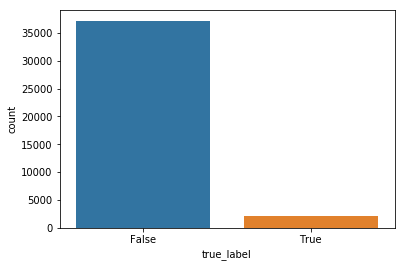

In [11]:
#Plot class distribution
sns.countplot(x="true_label", data=newdata)

In [12]:
#Feature Selection, 'Duration','Protocol','Packet', 'Bytes'
final_data = newdata[['Duration','Protocol','Packet', 'Bytes']]

In [13]:
final_data

,Duration,Protocol,Packet,Bytes
1,0.444,TCP,300,19566
4,0.442,TCP,579,728343
8,0.019,TCP,2,132
10,0.000,TCP,1,66
36,4.965,TCP,86,5160
37,4.965,TCP,171,258894
57,4.885,TCP,75,84500
59,4.880,TCP,37,2220
70,0.000,TCP,1,60
73,0.000,TCP,1,66


In [14]:
temp_dur=final_data['Duration']
temp_packets=final_data['Packet']
temp_bytes=final_data['Bytes']

In [15]:
final_data=final_data.drop("Duration",1)
final_data=final_data.drop("Packet",1)
final_data=final_data.drop("Bytes",1)

In [16]:
final_data

,Protocol
1,TCP
4,TCP
8,TCP
10,TCP
36,TCP
37,TCP
57,TCP
59,TCP
70,TCP
73,TCP


In [17]:
#One hot encoding for categorical variables
final_data = pd.get_dummies(final_data)
X = final_data
y = newdata['true_label']

In [18]:
final_data

,Protocol_ICMP,Protocol_TCP,Protocol_UDP
1,0,1,0
4,0,1,0
8,0,1,0
10,0,1,0
36,0,1,0
37,0,1,0
57,0,1,0
59,0,1,0
70,0,1,0
73,0,1,0


In [19]:
#Final Features
X=final_data.join(temp_packets).join(temp_dur).join(temp_bytes)

In [20]:
X

,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Packet,Duration,Bytes
1,0,1,0,300,0.444,19566
4,0,1,0,579,0.442,728343
8,0,1,0,2,0.019,132
10,0,1,0,1,0.000,66
36,0,1,0,86,4.965,5160
37,0,1,0,171,4.965,258894
57,0,1,0,75,4.885,84500
59,0,1,0,37,4.880,2220
70,0,1,0,1,0.000,60
73,0,1,0,1,0.000,66


In [21]:
y

1         False
4         False
8         False
10        False
36        False
37        False
57        False
59        False
70        False
73        False
81        False
89        False
90        False
91        False
94        False
96        False
97        False
102       False
127       False
128       False
129       False
131       False
134       False
135       False
136       False
137       False
138       False
139       False
140       False
141       False
          ...  
454991    False
455012    False
455051    False
455053    False
455055    False
455073     True
455099     True
455110    False
455133    False
455136    False
455140    False
455152    False
455168    False
455185    False
455189    False
455195    False
455207    False
455227    False
455253    False
455262    False
455269    False
455271    False
455336    False
455337    False
455338    False
455355    False
455508    False
455509    False
455511    False
455524    False
Name: true_label, Length

In [22]:
#Use a Random Forest classifier and perform class balance
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
y_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred=y_pred,y_true=y_test).ravel()

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

In [25]:
#Evaluation flow level
acc= accuracy_score(y_pred,y_test)*100
f1= f1_score(y_pred,y_test)*100
rec= recall_score(y_pred,y_test)*100
prec=precision_score(y_pred,y_test)*100

In [26]:
print("Accuracy:","%.2f" % acc)
print("Precision:","%.2f" % prec)
print("Recall:", "%.2f" %rec)
print("F_score:","%.2f" % f1)

Accuracy: 95.11
Precision: 66.97
Recall: 54.89
F_score: 60.33


In [27]:
tn, fp, fn, tp

(7179, 240, 144, 292)

In [28]:
# Investigation of the performance of the classifier with the same features as in task 4
XX=X.drop("Duration",1)
XX=XX.drop("Bytes",1)
print(XX)
#Use a Random Forest classifier and perform class balance
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred=y_pred,y_true=y_test).ravel()
acc= accuracy_score(y_pred,y_test)*100
f1= f1_score(y_pred,y_test)*100
rec= recall_score(y_pred,y_test)*100
prec=precision_score(y_pred,y_test)*100
print("Accuracy:","%.2f" % acc)
print("Precision:","%.2f" % prec)
print("Recall:", "%.2f" %rec)
print("F_score:","%.2f" % f1)

        Protocol_ICMP  Protocol_TCP  Protocol_UDP Packet
1                   0             1             0    300
4                   0             1             0    579
8                   0             1             0      2
10                  0             1             0      1
36                  0             1             0     86
37                  0             1             0    171
57                  0             1             0     75
59                  0             1             0     37
70                  0             1             0      1
73                  0             1             0      1
81                  0             1             0     49
89                  0             1             0    596
90                  0             1             0    366
91                  0             1             0      1
94                  0             1             0      4
96                  0             1             0      4
97                  0          

In [29]:
newdata['y_pred'] = clf.predict(X)

C:\Users\pc1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
newdata

,StartTime,Duration,Protocol,Flags,Tos,Packet,Bytes,Flows,Label,SourceIP,PORTSOURCE,DestinationIP,PORTDESTINATION,true_label,y_pred
1,2011-08-15 16:43:20.933,0.444,TCP,FPA_,0,300,19566,1,LEGITIMATE\n,147.32.87.252,49218,147.32.80.13,3128,False,False
4,2011-08-15 16:43:20.933,0.442,TCP,FPA_,0,579,728343,1,LEGITIMATE\n,147.32.80.13,3128,147.32.87.252,49218,False,False
8,2011-08-15 16:43:20.934,0.019,TCP,FA_,0,2,132,1,LEGITIMATE\n,66.249.66.10,64580,147.32.87.36,80,False,False
10,2011-08-15 16:43:20.934,0.000,TCP,FA_,0,1,66,1,LEGITIMATE\n,147.32.87.36,80,66.249.66.10,64580,False,False
36,2011-08-15 16:43:20.958,4.965,TCP,A_,0,86,5160,1,LEGITIMATE\n,113.193.72.126,51809,147.32.87.36,80,False,False
37,2011-08-15 16:43:20.958,4.965,TCP,PA_,0,171,258894,1,LEGITIMATE\n,147.32.87.36,80,113.193.72.126,51809,False,False
57,2011-08-15 16:43:20.977,4.885,TCP,PA_,0,75,84500,1,LEGITIMATE\n,147.32.80.13,80,147.32.84.162,60840,False,False
59,2011-08-15 16:43:20.978,4.880,TCP,A_,0,37,2220,1,LEGITIMATE\n,147.32.84.162,60840,147.32.80.13,80,False,False
70,2011-08-15 16:43:21.005,0.000,TCP,A_,0,1,60,1,LEGITIMATE\n,147.32.84.59,49271,74.125.232.213,443,False,False
73,2011-08-15 16:43:21.009,0.000,TCP,A_,0,1,66,1,LEGITIMATE\n,147.32.84.21,59122,74.125.232.202,443,False,False


In [31]:
source=newdata['SourceIP'].value_counts()
source

147.32.84.59       10044
147.32.84.164       3622
147.32.84.170       3246
147.32.84.118       2874
147.32.84.134       2640
147.32.80.13        2336
147.32.84.165       1443
147.32.85.7          924
147.32.80.9          677
147.32.84.21         549
147.32.86.187        532
147.32.84.162        482
147.32.86.168        477
147.32.85.88         476
147.32.84.184        433
147.32.86.165        339
147.32.84.25         337
147.32.86.44         311
147.32.84.3          309
147.32.84.216        307
147.32.84.13         293
46.4.36.120          275
147.32.85.40         251
147.32.85.76         232
147.32.85.26         227
147.32.84.68         224
212.117.171.138      207
147.32.84.69         200
147.32.85.8          194
66.249.66.10         191
                   ...  
66.220.153.19          2
147.32.87.254          2
95.168.214.160         2
178.150.239.17         2
195.113.232.73         2
147.32.87.38           2
200.29.243.1           1
60.190.222.152         1
192.168.88.105         1


In [32]:
destination=newdata['DestinationIP'].value_counts()
destination

147.32.80.13       3794
147.32.80.9        2998
147.32.84.134      2336
74.125.232.213     1543
74.125.39.125      1118
74.125.232.216     1066
74.125.232.214      987
74.125.232.215      920
147.32.84.59        887
209.85.148.104      814
209.85.149.132      715
147.32.84.165       686
209.85.149.189      673
209.85.148.105      652
74.125.232.195      622
209.85.148.103      615
74.125.232.192      614
209.85.148.99       609
74.125.232.223      584
74.125.232.207      578
74.125.232.202      535
209.85.148.106      515
74.125.232.206      513
74.125.232.199      510
74.125.232.196      491
209.85.148.147      472
147.32.87.36        446
147.32.84.162       431
74.125.232.204      414
74.125.232.193      401
                   ... 
41.93.130.4           1
217.86.200.89         1
182.177.235.90        1
199.255.211.81        1
183.83.68.80          1
85.185.226.13         1
119.154.54.142        1
218.241.209.6         1
178.150.146.54        1
113.36.206.49         1
192.58.128.30   

In [33]:
result = pd.concat([source, destination], axis=1, join='inner')

In [34]:
result

,SourceIP,DestinationIP
147.32.84.59,10044,887
147.32.84.134,2640,2336
147.32.80.13,2336,3794
147.32.84.165,1443,686
147.32.80.9,677,2998
147.32.84.162,482,431
147.32.85.88,476,106
147.32.86.44,311,267
147.32.84.3,309,303
147.32.84.13,293,45


In [35]:
iniqueIPS=result.index
iniqueIPS

Index(['147.32.84.59', '147.32.84.134', '147.32.80.13', '147.32.84.165',
       '147.32.80.9', '147.32.84.162', '147.32.85.88', '147.32.86.44',
       '147.32.84.3', '147.32.84.13',
       ...
       '61.89.186.155', '217.86.200.89', '27.255.59.65', '190.151.53.33',
       '192.58.128.30', '94.52.57.11', '92.47.5.149', '117.204.76.152',
       '182.177.235.90', '86.126.237.212'],
      dtype='object', length=153)

In [36]:
len(iniqueIPS)

153

In [37]:
host_predictions=np.zeros(len(iniqueIPS))
for i,IP in enumerate(iniqueIPS):
    
    for index, row in newdata.iterrows():
        if row['DestinationIP']==IP or row['SourceIP']==IP:
            if row["y_pred"]==True:
                host_predictions[i]=1
                break    

In [38]:
host_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [39]:
iniqueIPS

Index(['147.32.84.59', '147.32.84.134', '147.32.80.13', '147.32.84.165',
       '147.32.80.9', '147.32.84.162', '147.32.85.88', '147.32.86.44',
       '147.32.84.3', '147.32.84.13',
       ...
       '61.89.186.155', '217.86.200.89', '27.255.59.65', '190.151.53.33',
       '192.58.128.30', '94.52.57.11', '92.47.5.149', '117.204.76.152',
       '182.177.235.90', '86.126.237.212'],
      dtype='object', length=153)

In [40]:
Predictions_frame = pd.DataFrame({'IP':iniqueIPS, 'Predicted_Label':host_predictions})

In [41]:
Predictions_frame

,IP,Predicted_Label
0,147.32.84.59,1.0
1,147.32.84.134,1.0
2,147.32.80.13,1.0
3,147.32.84.165,1.0
4,147.32.80.9,1.0
5,147.32.84.162,1.0
6,147.32.85.88,1.0
7,147.32.86.44,1.0
8,147.32.84.3,1.0
9,147.32.84.13,0.0


In [42]:
True_labels=np.zeros(len(iniqueIPS))
True_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
IPS_infected=['147.32.84.165']
IPS_infected

['147.32.84.165']

In [44]:
for j,infected in enumerate(IPS_infected):
    for i,IP in enumerate(iniqueIPS):
        if infected==IP:
            True_labels[i]=1  

In [45]:
True_labels

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
len(True_labels)

153

In [47]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(True_labels)):
    if(host_predictions[i] == 1 and True_labels[i] == 1):
        tp = tp + 1
    if(host_predictions[i] == 1 and True_labels[i] == 0):
        fp = fp + 1
    if(host_predictions[i] == 0 and True_labels[i] == 1):
        fn = fn + 1    
    if(host_predictions[i] == 0 and True_labels[i] == 0):
        tn = tn + 1
print ("TP:",tp)
print ("FP:",fp)
print ("FN:",fn)
print ("TN:",tn)

TP: 1
FP: 64
FN: 0
TN: 88


In [48]:
#Evaluation Host Level
accuracy = accuracy_score(True_labels, host_predictions)*100
f1 = f1_score(True_labels, host_predictions)*100
precision = precision_score(True_labels, host_predictions)*100
recall = recall_score(True_labels, host_predictions)*100
confusion_matrix_ = confusion_matrix(True_labels, host_predictions)

In [49]:
print("Accuracy:","%.2f" % accuracy)
print("Precision:","%.2f" % precision)
print("Recall:", "%.2f" %recall)
print("F_score:","%.2f" % f1)

Accuracy: 58.17
Precision: 1.54
Recall: 100.00
F_score: 3.03


In [50]:
######Try a threshold in Host Level##########

host_predictions=np.zeros(len(iniqueIPS))
for i,IP in enumerate(iniqueIPS):
    threshold=0
    
    for index, row in newdata.iterrows():
        if row['DestinationIP']==IP or row['SourceIP']==IP:
            if row["y_pred"]==True:
                threshold+=1
    if threshold>=100:
        host_predictions[i]=1
                    

KeyboardInterrupt: 

In [ ]:
host_predictions

In [ ]:
iniqueIPS

In [ ]:
Predictions_frame = pd.DataFrame({'IP':iniqueIPS, 'Predicted_Label':host_predictions})
Predictions_frame

In [ ]:
True_labels=np.zeros(len(iniqueIPS))
True_labels

In [ ]:
IPS_infected=['147.32.84.165']
IPS_infected

In [ ]:
for j,infected in enumerate(IPS_infected):
    for i,IP in enumerate(iniqueIPS):
        if infected==IP:
            True_labels[i]=1  

In [ ]:
True_labels

In [ ]:
len(True_labels)

In [ ]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(True_labels)):
    if(host_predictions[i] == 1 and True_labels[i] == 1):
        tp = tp + 1
    if(host_predictions[i] == 1 and True_labels[i] == 0):
        fp = fp + 1
    if(host_predictions[i] == 0 and True_labels[i] == 1):
        fn = fn + 1    
    if(host_predictions[i] == 0 and True_labels[i] == 0):
        tn = tn + 1
print ("TP:",tp)
print ("FP:",fp)
print ("FN:",fn)
print ("TN:",tn)

In [ ]:
#Evaluation Host Level
accuracy = accuracy_score(True_labels, host_predictions)*100
f1 = f1_score(True_labels, host_predictions)*100
precision = precision_score(True_labels, host_predictions)*100
recall = recall_score(True_labels, host_predictions)*100
confusion_matrix_ = confusion_matrix(True_labels, host_predictions)

In [ ]:
print("Accuracy:","%.2f" % accuracy)
print("Precision:","%.2f" % precision)
print("Recall:", "%.2f" %recall)
print("F_score:","%.2f" % f1)